In [131]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

#clinical_trial_data.head()

# Combine the data into a single dataset
data_df = clinical_trial_data.merge(mouse_drug_data, on="Mouse ID")

# Display the data table for preview
data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [132]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [133]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_tumor_volume = pd.DataFrame(sem_tumor_volume)

# Preview DataFrame
sem_tumor_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [146]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_reformat = mean_tumor_volume.unstack(0)["Tumor Volume (mm3)"]
sem_tumor_volume_reformat = sem_tumor_volume.unstack(0)["Tumor Volume (mm3)"]
# Preview that Reformatting worked
mean_tumor_volume_reformat = mean_tumor_volume_reformat.reset_index()

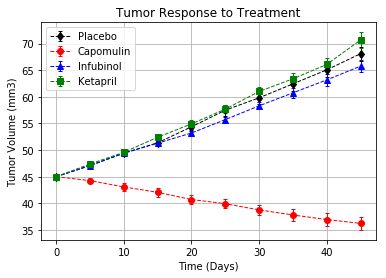

In [147]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_volume_reformat["Timepoint"], 
             mean_tumor_volume_reformat["Placebo"], 
             yerr=sem_tumor_volume_reformat["Placebo"],
             label="Placebo", marker="d", color="k",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(mean_tumor_volume_reformat["Timepoint"], 
             mean_tumor_volume_reformat["Capomulin"], 
             yerr=sem_tumor_volume_reformat["Capomulin"],
             label="Capomulin", marker="o", color="r",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(mean_tumor_volume_reformat["Timepoint"], 
             mean_tumor_volume_reformat["Infubinol"], 
             yerr=sem_tumor_volume_reformat["Infubinol"],
             label="Infubinol", marker="^", color="b",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(mean_tumor_volume_reformat["Timepoint"], 
             mean_tumor_volume_reformat["Ketapril"], 
             yerr=sem_tumor_volume_reformat["Ketapril"],
             label="Ketapril", marker="s", color="g",
             linestyle="--", capsize=2, linewidth=1)
plt.grid()
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")


In [136]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [137]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites = data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_sites = pd.DataFrame(mean_met_sites)

# Preview DataFrame
mean_met_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [138]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites = data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
sem_met_sites = pd.DataFrame(sem_met_sites)

# Preview DataFrame
sem_met_sites.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [139]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites_reformat = mean_met_sites.unstack(0)["Metastatic Sites"]
sem_met_sites_reformat = sem_met_sites.unstack(0)["Metastatic Sites"]

# Preview that Reformatting worked
mean_met_sites_reformat = mean_met_sites_reformat.reset_index()

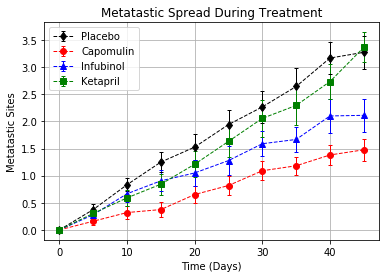

In [140]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_sites_reformat["Timepoint"], 
             mean_met_sites_reformat["Placebo"], 
             yerr=sem_met_sites_reformat["Placebo"],
             label="Placebo", marker="d", color="k",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(mean_met_sites_reformat["Timepoint"], 
             mean_met_sites_reformat["Capomulin"], 
             yerr=sem_met_sites_reformat["Capomulin"],
             label="Capomulin", marker="o", color="r",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(mean_met_sites_reformat["Timepoint"], 
             mean_met_sites_reformat["Infubinol"], 
             yerr=sem_met_sites_reformat["Infubinol"],
             label="Infubinol", marker="^", color="b",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(mean_met_sites_reformat["Timepoint"], 
             mean_met_sites_reformat["Ketapril"], 
             yerr=sem_met_sites_reformat["Ketapril"],
             label="Ketapril", marker="s", color="g",
             linestyle="--", capsize=2, linewidth=1)
plt.grid()
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Metatastic Sites")
plt.title("Metatastic Spread During Treatment")


# Save the Figure
plt.savefig("Metatastic_Spread_During_Treatment.png")


## Survival Rates

In [141]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates = data_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_rates_df = pd.DataFrame(survival_rates)

# Preview DataFrame
survival_rates_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [142]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_reformat = survival_rates_df.unstack(0)["Mouse ID"].reset_index()
survival_rates_reformat.head()
# Preview the Data Frame


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


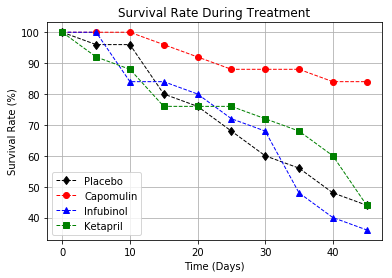

In [143]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(survival_rates_reformat["Timepoint"], 
             survival_rates_reformat["Placebo"]/survival_rates_reformat["Placebo"][0]*100, 
             label="Placebo", marker="d", color="k",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(survival_rates_reformat["Timepoint"], 
             survival_rates_reformat["Capomulin"]/survival_rates_reformat["Capomulin"][0]*100, 
             label="Capomulin", marker="o", color="r",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(survival_rates_reformat["Timepoint"], 
             survival_rates_reformat["Infubinol"]/survival_rates_reformat["Infubinol"][0]*100, 
             label="Infubinol", marker="^", color="b",
             linestyle="--", capsize=2, linewidth=1)
plt.errorbar(survival_rates_reformat["Timepoint"], 
             survival_rates_reformat["Ketapril"]/survival_rates_reformat["Ketapril"][0]*100, 
             label="Ketapril", marker="s", color="g",
             linestyle="--", capsize=2, linewidth=1)

plt.grid()
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate During Treatment")

# Save the Figure
plt.savefig("Survival_Rate_During_Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [175]:
# Calculate the percent changes for each drug
mean_tumor_volume = data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
per_changes = []

for drug in drugs:
        per_changes.append((mean_tumor_volume.loc[drug][45] - mean_tumor_volume.loc[drug][0])/mean_tumor_volume.loc[drug][0]*100)
        

per_changes_df = pd.DataFrame({"Drug": drugs, "Percentage Change": per_changes}).reset_index(drop=True)
# Display the data to confirm
per_changes_df

,Drug,Percentage Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


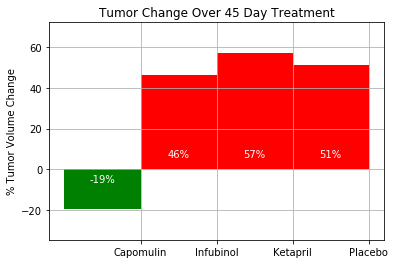

In [253]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
passing_drugs = per_changes_df.loc[per_changes_df["Percentage Change"] < 0]
failing_drugs = per_changes_df.loc[per_changes_df["Percentage Change"] >= 0]

# Orient widths. Add labels, tick marks, etc. 
ax = plt.bar(passing_drugs["Drug"], passing_drugs["Percentage Change"], width=-1, color="g", align="edge")
ax = plt.bar(failing_drugs["Drug"], failing_drugs["Percentage Change"], width=-1, color="r", align="edge")
plt.grid()
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlim(-1.2, 3.2)
plt.ylim(min(passing_drugs["Percentage Change"])-15, max(failing_drugs["Percentage Change"])+15)

labels = failing_drugs['Percentage Change'].reset_index(drop=True)
for x in range (0, len(labels), 1):
    plt.text(x + 0.5, 6, f"{labels[x]:.0f}%", horizontalalignment="center", color="w")
labels = passing_drugs['Percentage Change'].reset_index(drop=True)
plt.text(-0.5, -6, f"{labels[0]:.0f}%", horizontalalignment="center", color="w")

# Save the Figure
plt.savefig("Tumor_Change_Over_45_Day_Treatment.png")

# Show the Figure
#fig.show()